# **Homework Assignment #2**

# Student: Jovan Araiza, 11469149
Assigned: January 17, 2019

Due: January 29, 2019



---

This assignment consists of four questions can require a short answer and one that requires you to generate some Python code. You can enter your answers and your code directly in a Colaboratory notebook and upload the **shareable** link for the your notebook as your homework submission.



---

#1.
(8 points) In class we discussed the k-means algorithm that can be used to cluster data points. The algorithm can continue for a specified number of alterations. Alternatively, it could continue until it converges (no data points are assigned to new clusters during an iteration).

Is k-means guaranteed to converge? Why or why not?

# Answer
Yes it is guaranteed. According to the K-Means Convergence Theorem and K-means algorithm 35 from  http://ciml.info/ on page 179, the values of u and z from lines 6 and 9 are the only places where they can change. Since there is a finite possible number of assignments to z and u, we will eventually attain the combination with the smallest sum of squared distances. This means there is a finite number of times u and z will change, although it may only find an optimal local minimum. Different values of K should be tried for best results.


---


#2.
(12 points) Suppose there is a set of points in a two-dimensional space drawn from two different classes. The coordinates of the points are:



1.   Class Red: (0, 1), (2, 3), (4, 4)
2.   Class Blue: (2, 0), (5, 2), (6, 3)

Draw the k nearest neighbor decision boundary for k=1. Remember that the decision boundary is defined as the line / polygon where the classification of a test data point changes. Include the points, and their colors, in the plots.


Draw a second picture indicating what will happen to the decision boundary if the y coordinate of each point is multiplied by 5. Explain how this might cause classification problems.

# Answer
Drawings Link: https://drive.google.com/file/d/13Y2CzmCZBUPHyAhdPoVGQeznaoPg5cZD/view?usp=sharing

By multiplying y by 5, we are increasing all distances in the y direction making the x values less important in classifying. So we may miss classify a blue dot with a large y value as a red dot.

---

#3.
(8 points) Consider the problem from Homework #1 in which you drew a decision tree for the Boolean expression A XOR B. Draw the decision boundary for the tree below. This is one possible decision tree that represents the XOR function.

![alt text](https://drive.google.com/uc?id=1Ng4BH1LsKP9aAcEGxsMPXuMz3LR1x6__)

# Answer

Drawing Link: https://drive.google.com/file/d/1pPWrxWVAHdXyJG_dEC7BL5P54_MC-KnW/view?usp=sharing

---

#4.

(8 points) How does the computational complexity of the k nearest neighbors algorithm grow with the number of training samples *N* and the number of dimensions *D*? Explain / justify your answer.

# Answer
Using Alg 3 KNN-Predict(D,K,x) from http://ciml.info/ on page 33, the time complexity is about O(N*D + N*logN + K).

N*D comes from line 3, where for each datapoint n, we calculate the distance of the x to n. The time complexity of distance calculation is O(D) where is D is the number of dimensions.

N*logN comes from line 5. Sorting worst time complexity would be NlogN using merge sort of heap sort.

K comes from line 7.

---

#5.


(100 points) In this assignment you need to write a Python program that uses the k means algorithm to cluster a set of data points. The value of *k* and the number of *iterations* should be parameters that can be changed. Most commonly, the Euclidean distance function is used to compute distance between each point and the cluster centers. In this program we ask that you implement the Euclidean distance function.

In addition, also implement the Manhattan distance function. Given two points $X = (x_1, x_2, \ldots, x_d)$ and $Y = (y_1, y_2, \ldots, y_d)$, the Manhattan distance is defined as $Manhattan(X,Y) = \sum_{i=1}^{d} |x_i - y_i|$. *Note that all of the code you write needs to be entirely your own, not copied from another existing program or using existing libraries that perform the specified functionality.*

#Your role:

You need to complete four tasks for this problem

* First, implement the k means code in python, documenting the steps well.

* Second, use your code to cluster the *3D Road Network* data found in the UCI Machine Learning Repository. A description of the dataset is found at https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29#. You can download the data for this homework from http://eecs.wsu.edu/~cook/ml/hw/3D_spatial_network.txt, where the data has been modified to remove the OpenStreetMap ID and to only include the first 5000 data points.

* Third, create visualizations of the clusters you generate. Use the visualizations to answer the following questions:

What differences in the clusters assignments do you observe when using the Manhattan distance versus Euclidean distance?

What number of clusters seems like the best fit for this dataset, and why?

Here is code you can use as a starting point for your visualization. Here we extracted a sample of 12 points from the actual road network dataset and hard coded assigned cluster labels for each of the points. A 3D scatter plot is created that shows the locations of each point, and the colors of the points are based on the cluster number of each data point.


!

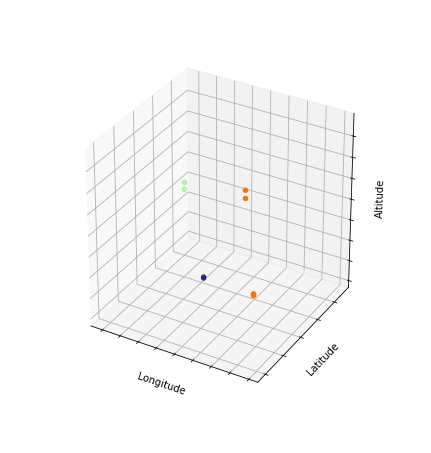

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab
from mpl_toolkits.mplot3d import Axes3D

def argmin_euc(K,U,x):
    distances = [0.0]*K
    for k in range(K):
        for dim in range(len(U[k])):
            distances[k]+= (U[k][dim] - x[dim])**2
        distances[k] = distances[k]**(0.5)
    Min_d = float('Inf')
    Min_k = -1
    for k in range(K):
        if distances[k] < Min_d:
            Min_d = distances[k]
            Min_k = k
    return Min_k
    
def argmin_man(K,U,x):
    Min = 0.0

def mean(X):
    dimensions = len(X[0])
    u = [0]*dimensions
    total = len(X)
    for n in X:
        for d in range(dimensions):
            u[d]+=n[d]
    for d in range(dimensions):
        u[d] /= total
    return u
    
def k_means(D,K,max_iter):
    U = []
    Z = []
    change = True
    it = 0
    # randomly pick center points
    for i in range(K):
        U.append(D[i])
    while change and it < max_iter:
        Z.clear()
        for x in D:
            Z.append(argmin_euc(K,U,x))
        change = False
        for k in range(K):
            new_U_k = mean([D[n] for n in range(len(D)) if Z[n] == k])
            if new_U_k != U[k]:
                change = True
            U[k] = new_U_k
        it+=1
    return Z
        

num_clusters = 4
fig1 = plt.figure(1, figsize=(6,6))
ax = Axes3D(fig1, rect=[0, 0, .95, 1])
X = [[9.3498486,56.7408757,17.0527715677876],
    [9.3501884,56.7406785,17.614840244389],
    [8.5856624,57.0106364,32.0776406065856],
    [8.5851822,57.0099725,28.7124475240045],
    [10.0015925,56.6369145,75.2648335602078],
    [10.0019142,56.6373512,71.556921301853],
    [9.5685446,57.0522153,1.94681426140926],
    [9.5693017,57.05361,2.24977425104904],
    [9.912351,57.0257797,3.66317365511644],
    [10.1787039,56.592082,33.5740971625897],
    [10.1782748,56.592342,33.8217791473094],
    [10.1779273,56.5923715,33.0209795956494]]
labels = [0, 0, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2]

ax.scatter([row[0] for row in X], [row[1] for row in X], [row[2] for row in X], \
           c=[int(i % num_clusters) for i in labels], cmap=pylab.cm.gist_ncar)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.dist = 12

In [25]:
pred_labels = k_means(X,num_clusters,6)
print(pred_labels)

[1, 1, 3, 3, 2, 2, 0, 0, 0, 3, 3, 3]


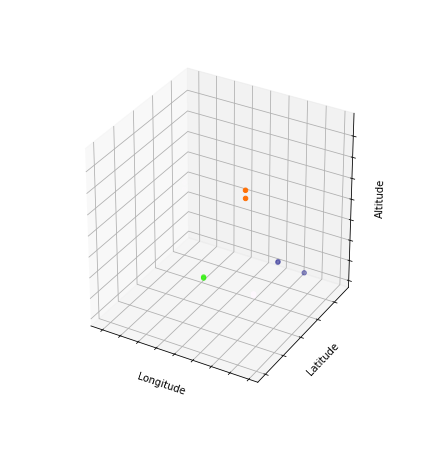

In [31]:
fig2 = plt.figure(2, figsize=(6,6))
ax = Axes3D(fig2, rect=[0, 0, .95, 1])
ax.scatter([row[0] for row in X], [row[1] for row in X], [row[2] for row in X], \
           c=[int(i % num_clusters) for i in pred_labels], cmap=pylab.cm.gist_ncar)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.dist = 12